In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import fastbook
fastbook.setup_book()
from fastbook import *
from ipywidgets import *

In [3]:
import os
os.chdir ("D://AI project/jpg/lymph300")

In [4]:
from pathlib import Path

entries = Path()
for entry in entries.iterdir():
    print(entry.name)

alymp
blast
lymph


In [5]:
path = Path()

In [6]:
path = ("D://AI project/jpg/lymph300")

In [7]:
files = get_image_files(path)
len(files)

900

In [8]:
path_img = path

In [9]:
fnames = get_image_files(path_img)

In [10]:
fnames[:4]

(#4) [Path('D:/AI project/jpg/lymph300/alymp/LYT_0002.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0005.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0010.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0012.jpg')]

In [11]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, seed=42, bs=4, num_workers=0)

In [12]:
fns = get_image_files(path)
fns

(#900) [Path('D:/AI project/jpg/lymph300/alymp/LYT_0002.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0005.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0010.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0012.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0017.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0028.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0034.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0046.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0050.jpg'),Path('D:/AI project/jpg/lymph300/alymp/LYT_0054.jpg')...]

In [14]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.228596,0.633747,0.261111,0.738889,00:52


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.919996,0.409766,0.138889,0.861111,01:11
1,0.780514,0.349429,0.144444,0.855556,01:11
2,0.623489,0.287637,0.088889,0.911111,01:11
3,0.574080,0.140768,0.038889,0.961111,01:11
4,0.441966,0.162626,0.066667,0.933333,01:12


In [15]:
learn.predict(files[0])

('alymp', tensor(0), tensor([0.5147, 0.0057, 0.4796]))

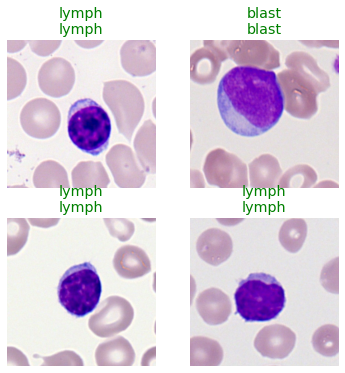

In [16]:
learn.show_results()

In [17]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=2.75422871709452e-06)

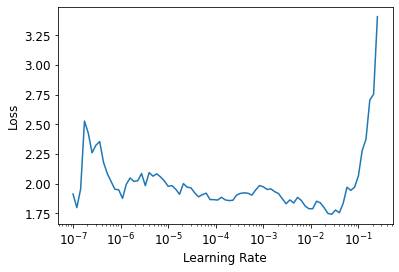

In [18]:
learn.lr_find()

In [17]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.364877,0.744409,0.288889,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.877343,0.343204,0.133333,01:09
1,0.720891,0.278037,0.111111,01:09


In [17]:
interp = Interpretation.from_learner(learn)

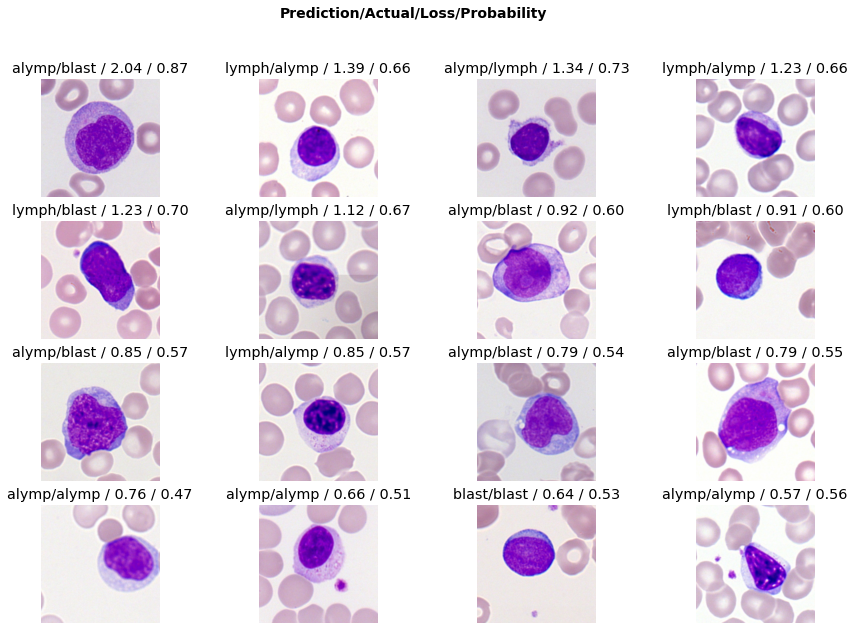

In [18]:
interp.plot_top_losses(16, figsize=(15,10))

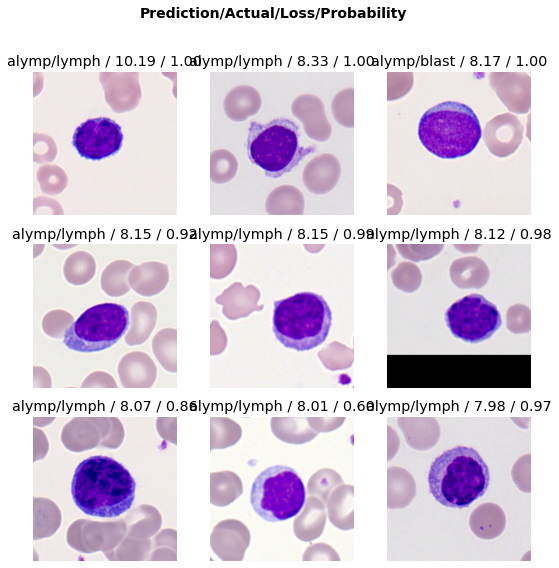

In [21]:
interp.plot_top_losses(9)

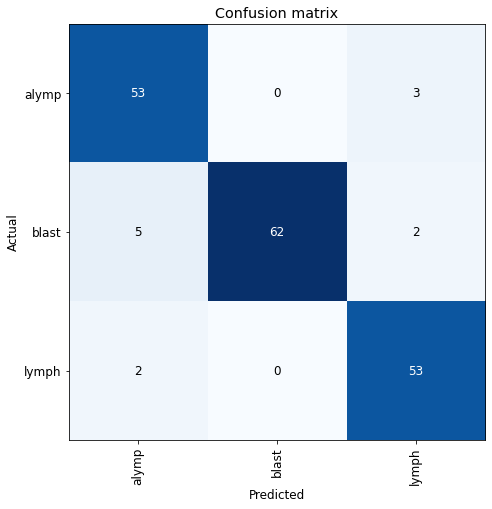

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [20]:
learn.export()

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [32]:
learn_inf.predict(Path('D:/AI project/jpg/lymph300/blast/MYO_0252.jpg'))

('blast', tensor(1), tensor([0.0013, 0.9900, 0.0086]))

In [23]:
learn_inf.dls.vocab

['alymp', 'blast', 'lymph']

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [25]:
img = PILImage.create(btn_upload.data[-1])

In [26]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

In [28]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: alymp; Probability: 0.5371')

In [29]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [30]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [31]:
btn_upload = widgets.FileUpload()

In [43]:
from ipywidgets import *

In [32]:
VBox([widgets.Label('Select your cell!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [33]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

The system cannot find the path specified.


The system cannot find the path specified.
Enabling: voila
- Writing config: C:\Users\m\Anaconda3\envs\fbook\etc\jupyter
    - Validating...
      voila 0.2.7 ok


In [31]:
import torch

In [34]:
torch.cuda.empty_cache()

In [19]:
import gc
del variables
gc.collect()

NameError: name 'variables' is not defined

In [33]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 3            |        cudaMalloc retries: 8         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    1156 MB |    1173 MB |    1514 GB |    1513 GB |\n|       from large pool |    1114 MB |    1149 MB |    1503 GB |    1502 GB |\n|       from small pool |      41 MB |      41 MB |      10 GB |      10 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    1156 MB |    1173 MB |    1514 GB |    1513 GB |\n|       from large pool |    1114 MB |    1149 MB |

In [32]:
CUDA_VISIBLE_DEVICES=""

In [1]:
defaults.device = 'cpu'

NameError: name 'defaults' is not defined

In [39]:
torch_core.defaults.device = 'cpu'

NameError: name 'torch_core' is not defined

In [18]:
device = torch.device("cpu")

In [104]:
!pip install voila

The system cannot find the path specified.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\m\\AppData\\Local\\Temp\\pip-uninstall-l5uaj146\\jupyter-nbconvert.exe'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.0
    Uninstalling nbconvert-5.6.0:
      Successfully uninstalled nbconvert-5.6.0


In [105]:
!jupyter serverextension enable --sys-prefix voila

[autoreload of nbconvert.preprocessors.execute failed: Traceback (most recent call last):
  File "C:\Users\m\anaconda3\envs\fbook\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\m\anaconda3\envs\fbook\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\m\anaconda3\envs\fbook\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\m\anaconda3\envs\fbook\lib\site-packages\IPython\extensions\autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "C:\Users\m\anaconda3\envs\fbook\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\m\anaconda3\envs\fbook\lib\site-packages\IPython\extensions\autoreload.py", line 266, in update_function
    setattr(old, name, getattr(